In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# define the processes and operands
processes = [
    'Refinement_Extracting', 'Refinement_Removing', 'Refinement_Recovery', 'Refinement_Distilling',
    'Separation_Capturing', 'Separation_Cooling', 'Separation_Removing',
    'Utilization_Ingest', 'Utilization_Produce'
]

operands = [
    'Natural gas from well', 'Water', 'Acidic gases', 'NGLs',
    'Pipeline quality natural gas', 'Flue gas', 'Other gases',
    'Liquid CO2', 'Microbes', 'Biofuel'
]

# define the interaction matrix
interaction_matrix = [
    [1,1,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,0,0,0,0,0],
    [0,1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,1,0]
]


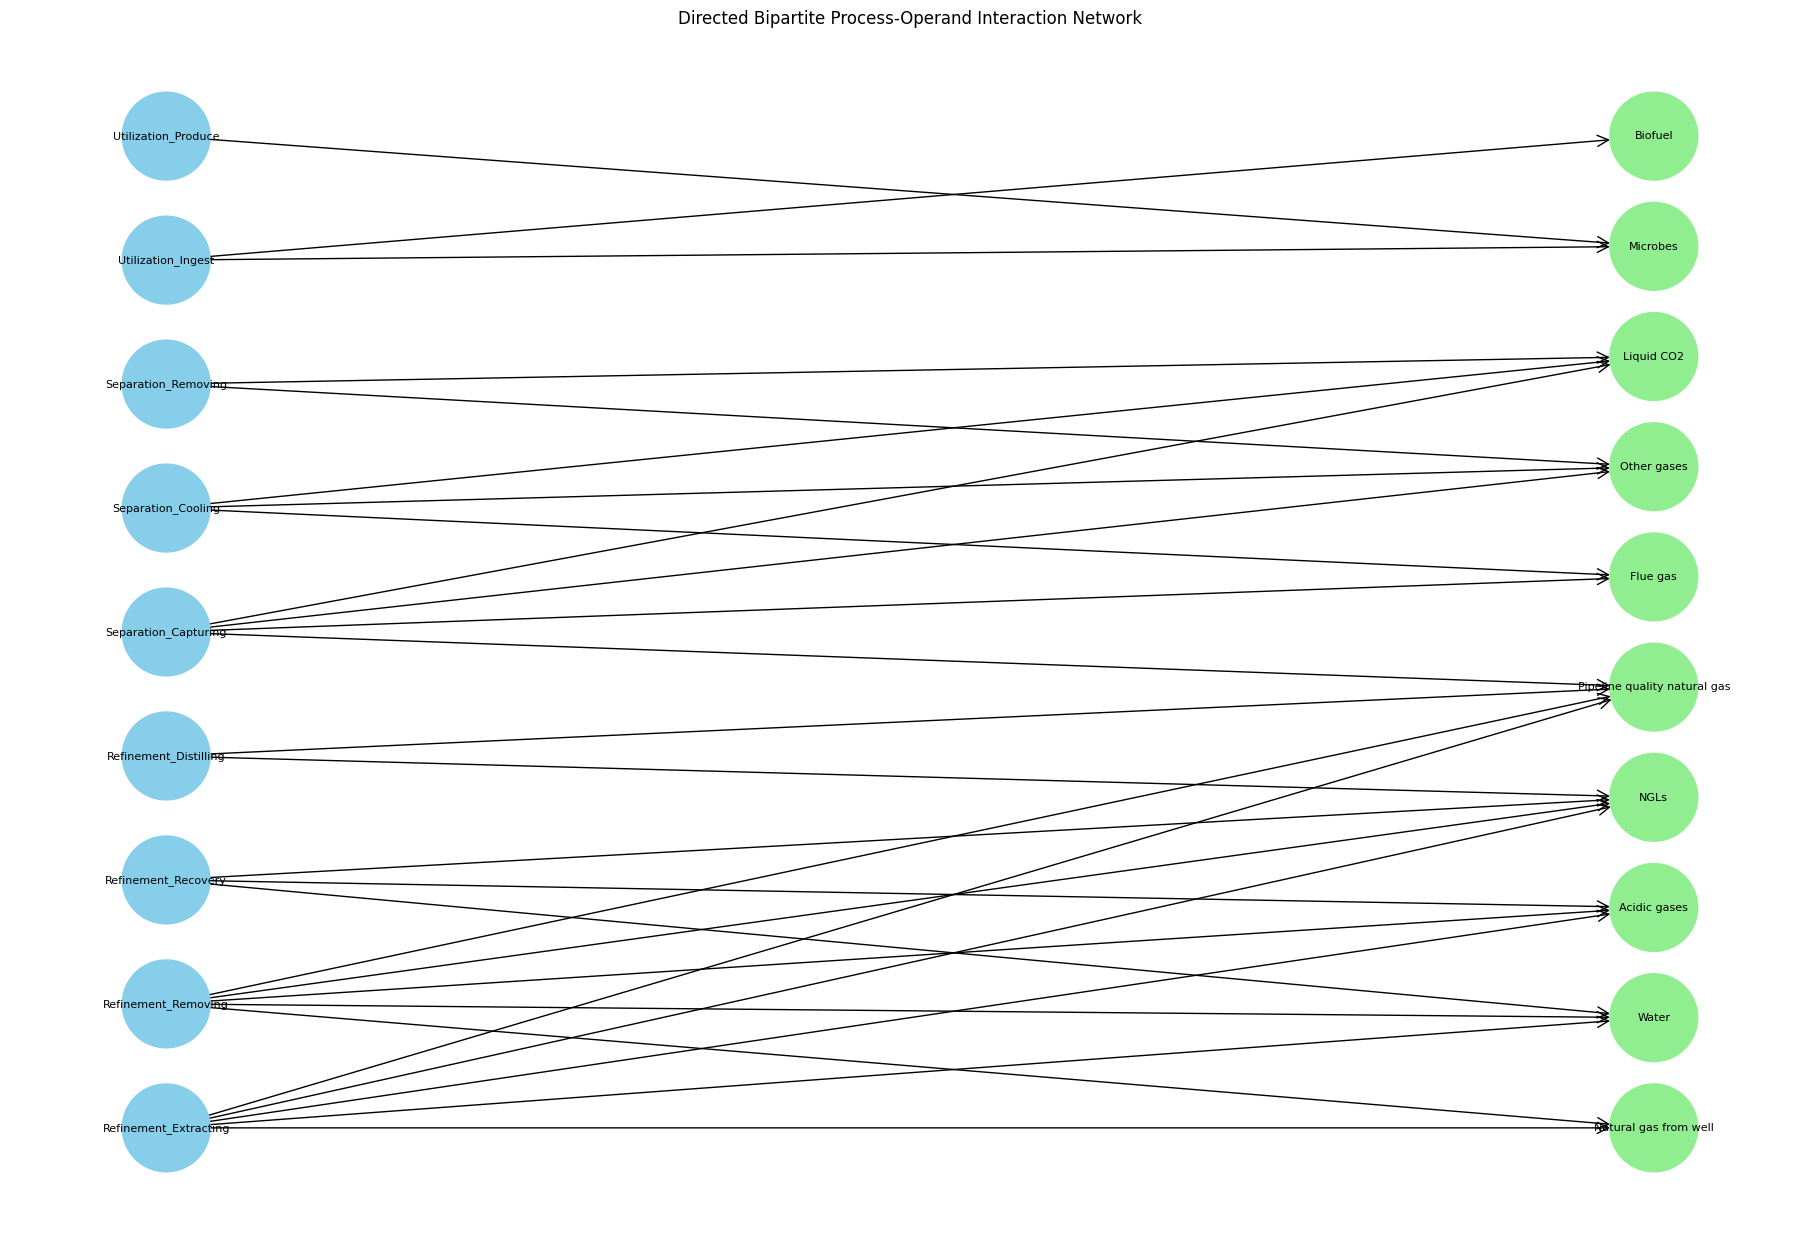

In [31]:
# create a directed bipartite graph
B = nx.DiGraph()
B.add_nodes_from(processes, bipartite=0)
B.add_nodes_from(operands, bipartite=1)

for i, process in enumerate(processes):
    for j, operand in enumerate(operands):
        if interaction_matrix[i][j]:
            B.add_edge(process, operand, weight=interaction_matrix[i][j])

plt.figure(figsize=(18,12))
pos = nx.bipartite_layout(B, nodes=processes)
nx.draw(B, pos, with_labels=True, node_size=4000, font_size=8,
        node_color=['skyblue' if n in processes else 'lightgreen' for n in B.nodes],
        arrowsize=20, arrowstyle='->')
plt.title("Directed Bipartite Process-Operand Interaction Network")
plt.show()

In [32]:
# Calculate and display the degree centrality of the nodes
degree_centrality = nx.degree_centrality(B)
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Critical Nodes by Degree Centrality:")
for node, centrality in sorted_nodes[:5]:
    print(f"- {node} (Centrality: {centrality:.2f})")


Top 5 Critical Nodes by Degree Centrality:
- Refinement_Extracting (Centrality: 0.28)
- Refinement_Removing (Centrality: 0.28)
- Separation_Capturing (Centrality: 0.22)
- NGLs (Centrality: 0.22)
- Pipeline quality natural gas (Centrality: 0.22)



Top 5 Processes by CPI:
- Refinement_Extracting: CPI = 5 (Out-Degree: 5, In-Degree: 0)
- Refinement_Removing: CPI = 5 (Out-Degree: 5, In-Degree: 0)
- Separation_Capturing: CPI = 4 (Out-Degree: 4, In-Degree: 0)
- Refinement_Recovery: CPI = 3 (Out-Degree: 3, In-Degree: 0)
- Separation_Cooling: CPI = 3 (Out-Degree: 3, In-Degree: 0)

Top 5 Operands by CPI:
- Biofuel: CPI = -1 (In-Degree: 1, Out-Degree: 0)
- Natural gas from well: CPI = -2 (In-Degree: 2, Out-Degree: 0)
- Flue gas: CPI = -2 (In-Degree: 2, Out-Degree: 0)
- Microbes: CPI = -2 (In-Degree: 2, Out-Degree: 0)
- Water: CPI = -3 (In-Degree: 3, Out-Degree: 0)

Detected Communities:
Community 1:
  Processes: ['Refinement_Extracting', 'Refinement_Recovery', 'Refinement_Distilling', 'Refinement_Removing']
  Operands: ['Acidic gases', 'Pipeline quality natural gas', 'NGLs', 'Natural gas from well', 'Water']

Community 2:
  Processes: ['Separation_Removing', 'Separation_Cooling', 'Separation_Capturing']
  Operands: ['Other gases', 'Flue 

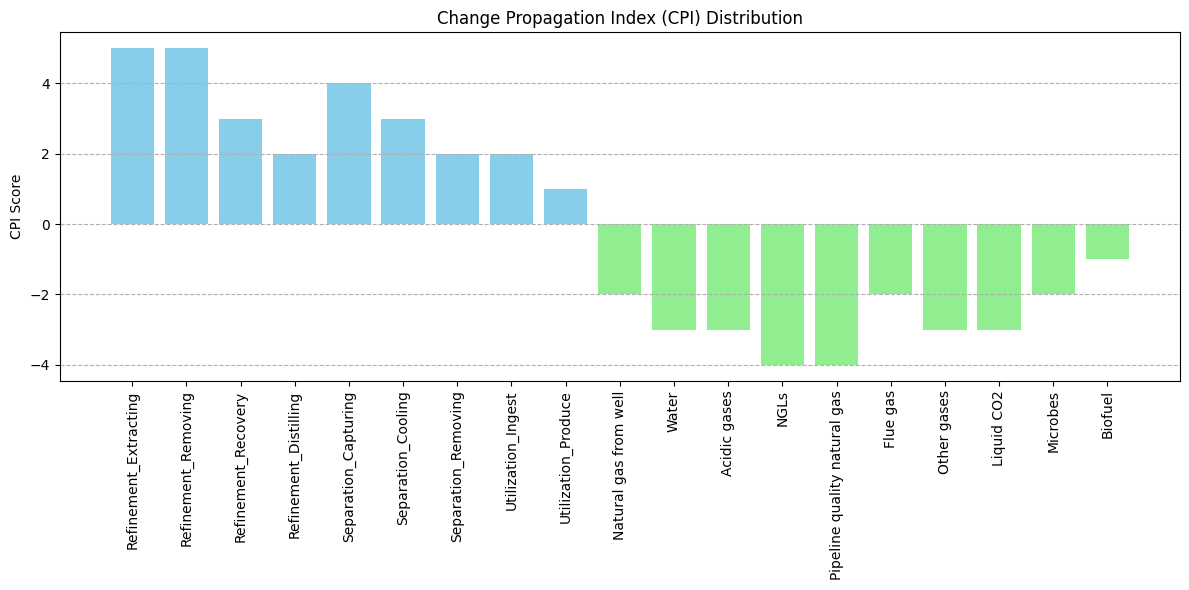

In [35]:
# calculate the CPI (Critical Path Index) for each node
cpi = {node: B.out_degree(node) - B.in_degree(node) for node in B.nodes}

process_cpi = {k: v for k, v in cpi.items() if k in processes}
operand_cpi = {k: v for k, v in cpi.items() if k in operands}

print("\nTop 5 Processes by CPI:")
for node, score in sorted(process_cpi.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"- {node}: CPI = {score} (Out-Degree: {B.out_degree(node)}, In-Degree: {B.in_degree(node)})")

print("\nTop 5 Operands by CPI:")
for node, score in sorted(operand_cpi.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"- {node}: CPI = {score} (In-Degree: {B.in_degree(node)}, Out-Degree: {B.out_degree(node)})")
    
communities = list(community.greedy_modularity_communities(B.to_undirected()))

print("\nDetected Communities:")
for i, comm in enumerate(communities):
    print(f"Community {i+1}:")
    print(f"  Processes: {[n for n in comm if n in processes]}")
    print(f"  Operands: {[n for n in comm if n in operands]}\n")

plt.figure(figsize=(12,6))
nodes = list(cpi.keys())
values = list(cpi.values())
colors = ['skyblue' if n in processes else 'lightgreen' for n in nodes]

plt.bar(nodes, values, color=colors)
plt.xticks(rotation=90)
plt.title("Change Propagation Index (CPI) Distribution")
plt.ylabel("CPI Score")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()